In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import ion_gen as ig
import compute as cm
import numpy as np

In [2]:
sys = ["F-Water_Cls"]

QM = {
    "MP2": ["Total"],
}

FF = {
    "AMOEBA": ["Total"],
    "AMOEBAF": ["Total"],
}


In [3]:
cwd = os.getcwd()
os.chdir(f"{cwd}/..")

In [4]:
# read in data

QM_methods = cm.getQMMethods(QM)

FF_methods = cm.getFFMethods(FF)


In [9]:
def plot(sys, QM, FF):
    for key in sys:
        intClass = cm.intClass[key]
        
        # 10
        if intClass == 10:
            index = ig.index[key]
            frame = ig.allCluster[key]
            QM_sub = {}
            for method,df in QM_methods.items():
                subset = df[df['Filename'].str.startswith(str(index))]
                QM_sub[method] = subset
#             print(list(QM_sub[method]["Total"]))
            FF_sub = {}
            for method,df in FF_methods.items():
                subset = df[df['Filename'].str.startswith(str(index))]
                FF_sub[method] = subset
            qm = "MP2"
            plt.figure(figsize=(12,7))
            e = "Total"
            mini = min(QM_sub[qm][e])
            maxi = max(QM_sub[qm][e])
            for ff in FF.keys():
                rmse = np.sqrt(np.mean((QM_sub[qm][e] - FF_sub[ff][e]) ** 2))
                plt.scatter(QM_sub[qm][e], FF_sub[ff][e], label=f"{ff}-{e}, RMSE={rmse:4.2f} kcal/mol",)
            
            plt.plot([mini, maxi], [mini, maxi], color='black', linestyle='--')
            plt.title(f'{key} Interaction Energy', fontsize=14)
            plt.xlabel(f'{qm} kcal/mol', fontsize=14)
            plt.ylabel(f'Model kcal/mol', fontsize=14)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.legend(fontsize=14)
    
    return

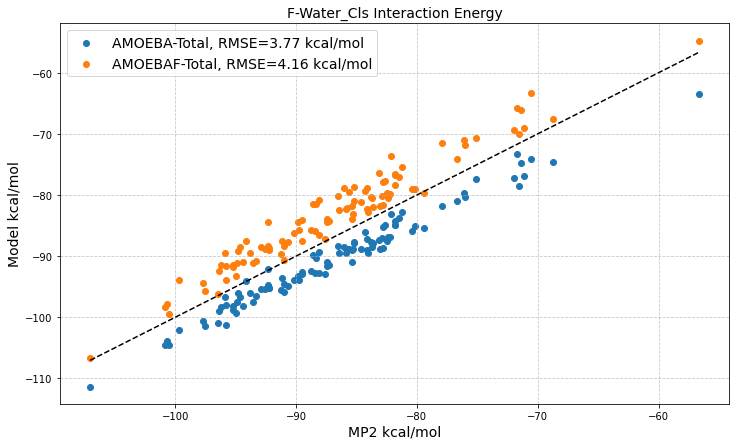

In [10]:
plot(sys, QM, FF)